In [132]:
import pandas as pd
import numpy as np

In [133]:
time_series_data = pd.read_csv('/Users/lucaconti/Desktop/Data/TimeSeries_v5_all_data.csv')
time_series_data['charttime'] = pd.to_datetime(time_series_data['charttime'])
time_series_data['aki_charttime'] = pd.to_datetime(time_series_data['aki_charttime'])
time_series_data['min_time'] = time_series_data.groupby('stay_id')['charttime'].transform('min')
time_series_data['max_time'] = time_series_data.groupby('stay_id')['charttime'].transform('max')
time_series_data['aki_charttime'] = time_series_data['aki_charttime'].fillna(0)
time_series_data['event'] = np.where((time_series_data['charttime']==time_series_data['max_time']) & (time_series_data['aki_charttime'] != 0) , 1, 0)
time_series_data['tot_hours'] = round(((time_series_data.max_time - time_series_data.min_time) / pd.Timedelta(minutes=1)) / 60)
collapsed_data = time_series_data.groupby(['stay_id']).mean().reset_index()

In [134]:
drugs = ['ace inhibitor',
 'acetaminophen',
 'alpha adrenergic agonist',
 'angiotensin receptor blocker',
 'angiotensin receptor neprilysin inhibitor',
 'anti-arrhythmic',
 'anti-diuretics',
 'antibiotics',
 'anticoagulant',
 'anticonvulsant',
 'antidepressant',
 'antiemetics',
 'antifungals',
 'antihypertensive alpha blocker',
 'antioxidant',
 'antiplatelet',
 'antipsychotic',
 'antivirals',
 'benzodiazepine',
 'beta blocker',
 'ca supplement',
 'calcium channel blocker',
 'chemotherapy',
 'diuretics',
 'fibrates',
 'gout medications',
 'h2 receptor blocker',
 'hmg-coa reductase inhibitors',
 'immunosuppressant',
 'metformin',
 'mood stabilizer',
 'nitrates',
 'nsaids',
 'opioids',
 'pde-3 inhibitor',
 'phosphate binder',
 'proton pump inhibitor',
 'sedatives',
 'steroids',
 'thyroid hormone',
 'vasodilator',
 'vasopressor']


In [135]:
pico_variables = [ 'event', 'tot_hours',
 'aado2_new',
 'ace inhibitor',
 'acetaminophen',
 'adm_age',
 'age_score', 
 'aids',
 'alpha adrenergic agonist',
 'angiotensin receptor blocker',
 'angiotensin receptor neprilysin inhibitor',
 'anti-arrhythmic',
 'anti-diuretics',
 'antibiotics',
 'anticoagulant',
 'anticonvulsant',
 'antidepressant',
 'antiemetics',
 'antifungals',
 'antihypertensive alpha blocker',
 'antioxidant',
 'antiplatelet',
 'antipsychotic',
 'antivirals',
 'baseexcess',
 'benzodiazepine',
 'beta blocker',
 'bicarbonate',
 'ca supplement',
 'calcium',
 'calcium channel blocker',
 'carboxyhemoglobin',
 'cerebrovascular_disease',
 'charlson_comorbidity_index',
 'chemotherapy',
 'chloride',
 'chronic_pulmonary_disease',
 'congestive_heart_failure',
 'dbp_avg_new',
 'dementia',
 'diabetes_with_cc',
 'diabetes_without_cc',
 'diuretics',
 'fibrates',
 'fio2_new',
 'glucose_new',
 'gout medications',
 'h2 receptor blocker',
 'heart_rate_avg',
 'hematocrit',
 'hemoglobin',
 'hmg-coa reductase inhibitors',
 'immunosuppressant',
 'lactate',
 'malignant_cancer',
 'mbp_ni_avg',
 'metastatic_solid_tumor',
 'metformin',
 'methemoglobin',
 'mild_liver_disease',
 'mood stabilizer',
 'myocardial_infarct',
 'nitrates',
 'nsaids',
 'opioids',
 'pao2fio2ratio',
 'paraplegia',
 'pco2',
 'pde-3 inhibitor',
 'peptic_ulcer_disease',
 'peripheral_vascular_disease',
 'ph',
 'phosphate binder',
 'po2',
 'potassium',
 'proton pump inhibitor',
 'renal_disease',
 'rheumatic_disease',
 'sbp_avg_new',
 'sedatives',
 'severe_liver_disease',
 'so2',
 'spo2_avg',
 'steroids',
 'temperature_new',
 'thyroid hormone',
 'totalco2',
 'vasodilator',
 'vasopressor',
 'weight']

In [136]:
data = collapsed_data[pico_variables]
binary_var = drugs + ['event','diabetes_with_cc','chronic_pulmonary_disease','aids',
                      'dementia', 'severe_liver_disease', 'renal_disease', 'malignant_cancer', 
                      'mild_liver_disease','cerebrovascular_disease', 'congestive_heart_failure',
                      'paraplegia', 'metastatic_solid_tumor', 'myocardial_infarct', 'peptic_ulcer_disease',
                      'peripheral_vascular_disease', 'rheumatic_disease', 'diabetes_without_cc']
data[binary_var] = np.where(data[binary_var]>0,1,0)

var_to_standardize = list(set(pico_variables) - set(binary_var) - set(['tot_hours']))
data[var_to_standardize] = data[var_to_standardize].apply(lambda x: (x-x.mean()) / (x.std())  
                                      if x.name not in binary_var else x , axis=0).values

/Users/lucaconti/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


0         2.0
1        45.0
2        23.0
3        22.0
4        14.0
         ... 
21159    13.0
21160    28.0
21161    48.0
21162    23.0
21163    28.0
Name: tot_hours, Length: 21164, dtype: float64

In [139]:
na_stripped = data[data.columns[data.isnull().mean() < 0.30]]
na_stripped = na_stripped.dropna()
#len(na_stripped[na_stripped['event']==1])/na_stripped['stay_id'].nunique()

In [140]:
l1_ratio = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
penalties = [0.0001, 0.001, 0.01, 0.1, 0, 1, 10]

In [141]:
#Finding the best penalizer  for the Cox Proportional Hazard Model
from lifelines import CoxPHFitter
best_AUC = 0
best_ratio = None
best_penalty = None
for ratio in l1_ratio:
    for penalty in penalties:
        cph = CoxPHFitter(l1_ratio=ratio, penalizer=penalty)
        cph.fit(na_stripped, duration_col='tot_hours', event_col='event')
        AUC = cph.concordance_index_
        if AUC > best_AUC:
            best_AUC = AUC
            best_ratio = ratio
            best_penalty = penalty

print(best_ratio)
print(best_penalty)
print(best_AUC)

/Users/lucaconti/opt/anaconda3/lib/python3.8/site-packages/lifelines/fitters/coxph_fitter.py:1524: LinAlgWarning: Ill-conditioned matrix (rcond=9.07584e-17): result may not be accurate.
  inv_h_dot_g_T = spsolve(-h, g, assume_a="pos", check_finite=False)
/Users/lucaconti/opt/anaconda3/lib/python3.8/site-packages/lifelines/fitters/coxph_fitter.py:1524: LinAlgWarning: Ill-conditioned matrix (rcond=6.63759e-17): result may not be accurate.
  inv_h_dot_g_T = spsolve(-h, g, assume_a="pos", check_finite=False)
/Users/lucaconti/opt/anaconda3/lib/python3.8/site-packages/lifelines/fitters/coxph_fitter.py:1524: LinAlgWarning: Ill-conditioned matrix (rcond=5.16973e-17): result may not be accurate.
  inv_h_dot_g_T = spsolve(-h, g, assume_a="pos", check_finite=False)
/Users/lucaconti/opt/anaconda3/lib/python3.8/site-packages/lifelines/fitters/coxph_fitter.py:1524: LinAlgWarning: Ill-conditioned matrix (rcond=3.96007e-17): result may not be accurate.
  inv_h_dot_g_T = spsolve(-h, g, assume_a="pos", 

0.01
0.01
0.7618576477281132


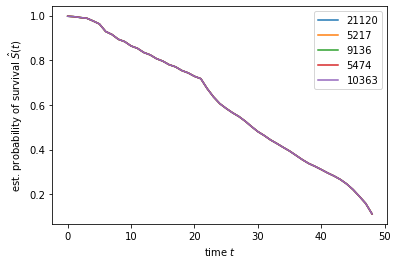

In [143]:
%matplotlib inline
import matplotlib.pyplot as plt
X = na_stripped.sample(5)
cph.predict_survival_function(X).plot()
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

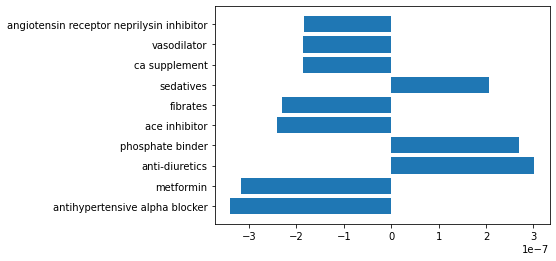

In [145]:
#importance of explanatory variables
import matplotlib.pyplot as plt
df = cph.params_.to_frame().reset_index()
df['abs'] = df.coef.abs()
df = df.sort_values(by='abs',ascending=False)
names = df['covariate'].to_list()[:10]
coef = df['coef'].to_list()[:10]
plt.barh(range(len(names)), coef, align='center')
plt.yticks(range(len(names)), names)
plt.show()

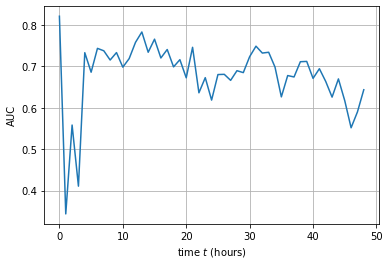

In [146]:
#Plotting time dependent AUC
hours = [t for t in range(49)]
time_depe_AUC = []
for t in hours:
    time_depe_AUC.append(cph.score(na_stripped[na_stripped['tot_hours']==t],scoring_method='concordance_index'))

plt.ylabel("AUC")
plt.xlabel("time $t$ (hours)")
plt.grid(True)
plt.plot(hours, time_depe_AUC)

In [98]:
#Testing proportional hazards assumption
cph.check_assumptions(na_stripped, p_value_threshold=0.05, show_plots=False)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



/Users/lucaconti/opt/anaconda3/lib/python3.8/site-packages/lifelines/fitters/mixins.py:108: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  for variable in self.params_.index & (columns or self.params_.index):


<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 21164 total observations, 10426 right-censored observations>
         test_name = proportional_hazard_test

---
                                                test_statistic      p  -log2(p)
aado2_new                                 km              5.87   0.02      6.02
                                          rank            5.56   0.02      5.77
ace inhibitor                             km             21.49 <0.005     18.10
                                          rank           21.66 <0.005     18.23
acetaminophen                             km             29.66 <0.005     24.21
                                          rank           42.18 <0.005     33.48
adm_age                                   km              2.03   0.15      2.70
                                          rank            1.03   0.31      1.69
age_score                                 km              0.04   0.84      0.25
                                          rank            0.19   0.66      0.60
aids                                      km              0.32   0.57      0.81
                                          rank            0.22   0.64      0.64
alpha adrenergic agonist                  km              1.43   0.23      2.11
                                          rank            1.71   0.19      2.39
angiotensin receptor blocker              km              2.92   0.09      3.51
                                          rank            3.57   0.06      4.09
angiotensin receptor neprilysin inhibitor km              2.73   0.10      3.34
                                          rank            1.52   0.22      2.20
anti-arrhythmic                           km              0.93   0.33      1.58
                                          rank            0.09   0.77      0.38
anti-diuretics                            km              0.79   0.37      1.42
                                          rank            0.84   0.36      1.48
antibiotics                               km              5.10   0.02      5.39
                                          rank            7.59   0.01      7.41
anticoagulant                             km             47.33 <0.005     37.28
                                          rank           52.86 <0.005     41.34
anticonvulsant                            km              1.66   0.20      2.34
                                          rank            4.87   0.03      5.19
antidepressant                            km             13.12 <0.005     11.74
                                          rank           16.03 <0.005     13.97
antiemetics                               km              3.60   0.06      4.11
                                          rank            7.34   0.01      7.21
antifungals                               km              4.86   0.03      5.19
                                          rank            5.53   0.02      5.74
antihypertensive alpha blocker            km              0.67   0.41      1.28
                                          rank            0.55   0.46      1.13
antioxidant                               km              0.02   0.89      0.17
                                          rank            0.00   0.95      0.07
antiplatelet                              km             75.47 <0.005     57.91
                                          rank           59.34 <0.005     46.10
antipsychotic                             km             11.63 <0.005     10.59
                                          rank           15.69 <0.005     13.71
antivirals                                km              5.01   0.03      5.31
                                          rank            6.38   0.01      6.44
baseexcess                                km              5.50   0.02      5.71
                                       



1. Variable 'aado2_new' failed the non-proportional test: p-value is 0.0154.

   Advice 1: the functional form of the variable 'aado2_new' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'aado2_new' using pd.cut, and then specify it in
`strata=['aado2_new', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'ace inhibitor' failed the non-proportional test: p-value is <5e-05.

   Advice: with so few unique values (only 2), you can include `strata=['ace inhibitor', ...]` in
the call in `.fit`. See documentation in link [E] below.

3. Variable 'acetaminophen' failed the non-proportional test: p-value is <5e-05.

   Advice: with so few unique 

[]

In [100]:
#re-estimating the model without variables that failed the proportional hazards assumption
var_failed_prop_hazard = ['aado2_new', 'ace inhibitor', 'acetaminophen', 'antibiotics', 'anticoagulant', 
                         'anticonvulsant','antidepressant', 'antiemetics', 'antifungals','antiplatelet'
                         'antipsychotic', 'antivirals', 'baseexcess', 'benzodiazepine', 'beta blocker',
                         'calcium', 'congestive_heart_failure', 'dbp_avg_new', 'diabetes_with_cc', 'diuretics'
                         'gout medications', 'h2 receptor blocker', 'heart_rate_avg', 'hmg-coa reductase inhibitors',
                         'malignant_cancer', 'mbp_ni_avg', 'myocardial_infarct', 'nitrates', 'nsaids','pao2fio2ratio'
                         'pco2', 'pde-3 inhibitor','peptic_ulcer_disease', 'ph','po2','proton pump inhibitor',
                         'so2', 'thyroid hormone', 'vasopressor' ]

rem_columns = list(set(na_stripped.columns) - set(var_failed_prop_hazard))

cph = CoxPHFitter(l1_ratio=0.01, penalizer=0.01)
prop_data = na_stripped[rem_columns]
cph.fit(prop_data, duration_col='tot_hours', event_col='event')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 21164 total observations, 10426 right-censored observations>
             duration col = 'tot_hours'
                event col = 'event'
                penalizer = 0.01
                 l1 ratio = 0.01
      baseline estimation = breslow
   number of observations = 21164
number of events observed = 10738
   partial log-likelihood = -95743.16
         time fit was run = 2022-04-25 07:57:14 UTC

---
                                            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                         
temperature_new                            -0.08       0.92       0.02            -0.13            -0.04                 0.88                 0.96
chronic_pulmonary_disease                   0.03       1.03       0.02            -0.02             0.08                 0.98                 1.08
angiotensin receptor neprilysin inhibitor  -0.03       0.97       0.37            -0.77             0.70                 0.46                 2.02
fio2_new                                   -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
anti-diuretics                              0.03       1.03       0.05            -0.07             0.13                 0.93                 1.13
pco2                                        0.01       1.01       0.00             0.01             0.02                 1.01                 1.02
aids                                       -0.59       0.55       0.14            -0.87            -0.32                 0.42                 0.73
weight                                      0.01       1.01       0.00             0.01             0.01                 1.01                 1.01
severe_liver_disease                        0.19       1.21       0.05             0.08             0.30                 1.09                 1.35
chemotherapy                               -0.07       0.93       0.23            -0.51             0.38                 0.60                 1.46
angiotensin receptor blocker               -0.17       0.84       0.06            -0.30            -0.05                 0.74                 0.95
dementia                                    0.22       1.25       0.04             0.14             0.31                 1.15                 1.36
sedatives                                   0.66       1.94       0.02             0.61             0.71                 1.85                 2.03
totalco2                                   -0.02       0.98       0.00            -0.03            -0.01                 0.97                 0.99
steroids                                   -0.52       0.59       0.03            -0.59            -0.46                 0.56                 0.63
lactate                                     0.07       1.07       0.01             0.05             0.09                 1.05                 1.09
methemoglobin                               0.11       1.12       0.08            -0.04             0.27                 0.96                 1.30
immunosuppressant                           0.03       1.03       0.07            -0.10             0.16                 0.90                 1.18
age_score                                  -0.05       0.95       0.02            -0.09            -0.00                 0.91                 1.00
antihypertensive alpha blocker             -0.56       0.57       0.32            -1.20             0.08                 0.30                 1.08
metformin                                  -0.56       0.57       0.18            -0.92            -0.21                 0.40                 0.81
renal_disease                               0.33       1.39       0.03             0.26             0.39                 1.30                 1.48
adm_age                           

In [102]:
#Checking assumptions without the variables that were previously found to violate the prop hazards assumption
cph.check_assumptions(prop_data, p_value_threshold=0.05, show_plots=False)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



/Users/lucaconti/opt/anaconda3/lib/python3.8/site-packages/lifelines/fitters/mixins.py:108: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  for variable in self.params_.index & (columns or self.params_.index):


<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 21164 total observations, 10426 right-censored observations>
         test_name = proportional_hazard_test

---
                                                test_statistic      p  -log2(p)
adm_age                                   km              0.95   0.33      1.60
                                          rank            0.43   0.51      0.96
age_score                                 km              5.15   0.02      5.43
                                          rank            6.92   0.01      6.87
aids                                      km              0.10   0.76      0.40
                                          rank            0.34   0.56      0.84
alpha adrenergic agonist                  km              3.95   0.05      4.42
                                          rank            4.35   0.04      4.76
angiotensin receptor blocker              km             13.74 <0.005     12.22
                                          rank           13.96 <0.005     12.39
angiotensin receptor neprilysin inhibitor km              1.65   0.20      2.33
                                          rank            0.81   0.37      1.44
anti-arrhythmic                           km              0.07   0.79      0.33
                                          rank            0.50   0.48      1.06
anti-diuretics                            km              0.83   0.36      1.46
                                          rank            0.73   0.39      1.35
antihypertensive alpha blocker            km              1.20   0.27      1.87
                                          rank            1.04   0.31      1.70
antioxidant                               km              0.01   0.91      0.13
                                          rank            0.00   0.95      0.07
antiplatelet                              km            381.33 <0.005    279.69
                                          rank          352.29 <0.005    258.68
antipsychotic                             km             16.73 <0.005     14.50
                                          rank           21.29 <0.005     17.95
bicarbonate                               km              0.00   0.98      0.03
                                          rank            0.06   0.80      0.32
ca supplement                             km             12.87 <0.005     11.55
                                          rank           14.93 <0.005     13.13
calcium channel blocker                   km              9.19 <0.005      8.68
                                          rank           10.10 <0.005      9.40
carboxyhemoglobin                         km              0.13   0.71      0.48
                                          rank            0.06   0.81      0.30
cerebrovascular_disease                   km              0.06   0.81      0.30
                                          rank            0.09   0.76      0.40
charlson_comorbidity_index                km              7.67   0.01      7.48
                                          rank            8.64 <0.005      8.25
chemotherapy                              km              0.44   0.51      0.98
                                          rank            0.49   0.48      1.05
chloride                                  km              0.53   0.47      1.10
                                          rank            0.01   0.93      0.11
chronic_pulmonary_disease                 km              0.17   0.68      0.55
                                          rank            0.48   0.49      1.03
dementia                                  km              3.55   0.06      4.07
                                          rank            5.16   0.02      5.43
diabetes_without_cc                       km              4.07   0.04      4.52
                                       



1. Variable 'fio2_new' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'fio2_new' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'fio2_new' using pd.cut, and then specify it in
`strata=['fio2_new', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'weight' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'weight' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional for

[]

In [84]:
#Data for parametric models --> assuming a parametric baseline as opposed to Breslow estimator
param_data = na_stripped[na_stripped.columns]
param_data = param_data.drop(param_data[param_data.tot_hours == 0].index)

In [85]:
#Cox parametric models --> Spline
cph_spline = CoxPHFitter(baseline_estimation_method="spline", n_baseline_knots=5)
cph_spline.fit(param_data, 'tot_hours', event_col='event')
cph_spline.print_summary()

<lifelines.CoxPHFitter: fitted with 21100 total observations, 10422 right-censored observations>
             duration col = 'tot_hours'
                event col = 'event'
 number of baseline knots = 5
      baseline estimation = spline
   number of observations = 21100
number of events observed = 10678
           log-likelihood = -45104.77
         time fit was run = 2022-04-25 07:13:51 UTC

---
                                                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param covariate                                                                                                                                         
beta_ aado2_new                                  -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
      ace inhibitor                              -0.30       0.74       0.05            -0.39            -0.20                 0.67                 0.82
      acetaminophen                              -0.38       0.68       0.02            -0.43            -0.34                 0.65                 0.71
      adm_age                                     0.02       1.02       0.00             0.01             0.02                 1.01                 1.02
      age_score                                   0.12       1.13       0.05             0.03             0.21                 1.03                 1.23
      aids                                        0.76       2.13       0.27             0.23             1.29                 1.26                 3.62
      alpha adrenergic agonist                   -0.09       0.92       0.13            -0.33             0.16                 0.72                 1.17
      angiotensin receptor blocker               -0.09       0.92       0.06            -0.21             0.04                 0.81                 1.04
      angiotensin receptor neprilysin inhibitor  -0.20       0.82       0.38            -0.95             0.55                 0.39                 1.73
      anti-arrhythmic                            -0.01       0.99       0.04            -0.09             0.07                 0.91                 1.07
      anti-diuretics                             -0.07       0.93       0.05            -0.17             0.04                 0.84                 1.04
      antibiotics                                -0.12       0.89       0.02            -0.17            -0.08                 0.85                 0.93
      anticoagulant                              -0.41       0.66       0.02            -0.46            -0.37                 0.63                 0.69
      anticonvulsant                             -0.29       0.75       0.03            -0.34            -0.23                 0.71                 0.79
      antidepressant                             -0.18       0.83       0.03            -0.24            -0.13                 0.79                 0.88
      antiemetics                                -0.16       0.86       0.03            -0.21            -0.10                 0.81                 0.90
      antifungals                                -0.30       0.74       0.09            -0.47            -0.12                 0.62                 0.88
      antihypertensive alpha blocker             -0.37       0.69       0.34            -1.03             0.28                 0.36                 1.33
      antioxidant                                -0.22       0.80       0.10            -0.41            -0.02                 0.66                 0.98
      antiplatelet                               -0.45       0.64       0.03            -0.51            -0.40                 0.60                 0.67
      antipsychotic                              -0.26       0.77       0.05            -0.35            -0.18                 0.70                 0.84
      antivirals                                 -0.43       0.65       0.07    

In [86]:
#Cox parametric models --> piecewise
cph_piecewise = CoxPHFitter(baseline_estimation_method="piecewise", breakpoints=[20, 35]).fit(param_data, 'tot_hours', event_col='event')
cph_piecewise.print_summary()

<lifelines.CoxPHFitter: fitted with 21100 total observations, 10422 right-censored observations>
             duration col = 'tot_hours'
                event col = 'event'
       location of breaks = [20, 35]
      baseline estimation = piecewise
   number of observations = 21100
number of events observed = 10678
           log-likelihood = -46040.75
         time fit was run = 2022-04-25 07:13:58 UTC

---
                                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param        covariate                                                                                                                                         
beta_        aado2_new                                  -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
             ace inhibitor                              -0.29       0.75       0.05            -0.38            -0.19                 0.68                 0.83
             acetaminophen                              -0.35       0.71       0.02            -0.39            -0.30                 0.67                 0.74
             adm_age                                     0.01       1.02       0.00             0.01             0.02                 1.01                 1.02
             age_score                                   0.13       1.13       0.05             0.04             0.21                 1.04                 1.24
             aids                                        0.77       2.17       0.27             0.24             1.30                 1.28                 3.68
             alpha adrenergic agonist                   -0.09       0.92       0.13            -0.34             0.16                 0.72                 1.17
             angiotensin receptor blocker               -0.08       0.93       0.06            -0.20             0.05                 0.82                 1.05
             angiotensin receptor neprilysin inhibitor  -0.17       0.84       0.38            -0.92             0.57                 0.40                 1.77
             anti-arrhythmic                            -0.01       0.99       0.04            -0.08             0.07                 0.92                 1.07
             anti-diuretics                             -0.04       0.96       0.05            -0.15             0.06                 0.86                 1.06
             antibiotics                                -0.10       0.90       0.02            -0.15            -0.06                 0.86                 0.94
             anticoagulant                              -0.37       0.69       0.02            -0.41            -0.33                 0.66                 0.72
             anticonvulsant                             -0.27       0.76       0.03            -0.32            -0.21                 0.72                 0.81
             antidepressant                             -0.17       0.84       0.03            -0.23            -0.11                 0.80                 0.89
             antiemetics                                -0.15       0.86       0.03            -0.20            -0.09                 0.82                 0.91
             antifungals                                -0.27       0.76       0.09            -0.44            -0.10                 0.64                 0.91
             antihypertensive alpha blocker             -0.36       0.70       0.34            -1.01             0.30                 0.36                 1.35
             antioxidant                                -0.21       0.81       0.10            -0.41            -0.02                 0.67                 0.98
             antiplatelet                               -0.44       0.65       0.03            -0.49            -0.38                 0.61                 0.68
             antipsychotic                              -0.23       0

<AxesSubplot:title={'center':'piecewise'}>

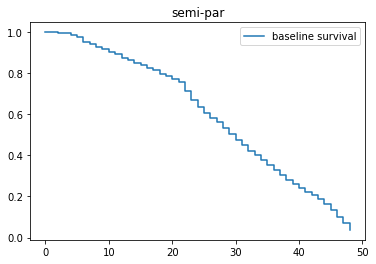

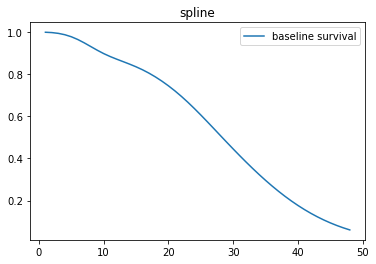

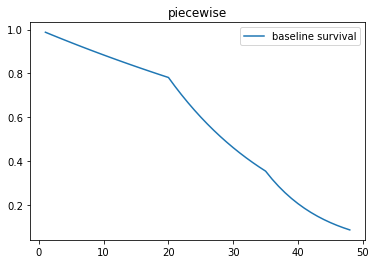

In [87]:
#printing baseline functions to see if there are any differences between estimators
cph.baseline_survival_.plot(drawstyle="steps-post", label = 'semi-par',title='semi-par')
cph_spline.baseline_survival_.plot(label='spline',title='spline')
cph_piecewise.baseline_survival_.plot(label='piecewise',title='piecewise')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation, LSTM, GRU, Embedding, Concatenate, Conv1D, GlobalMaxPooling1D, MaxPooling1D, GlobalAveragePooling1D, BatchNormalization, TimeDistributed
from keras import layers, regularizers
from tensorflow.keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
import math
from lifelines.utils import concordance_index
from sklearn.preprocessing import StandardScaler
from scipy import stats
import time
import nnet_survival

In [ ]:
time_series_data = pd.read_csv('/Users/lucaconti/Desktop/Data/TimeSeries_v5_all_data.csv')
time_series_data['charttime'] = pd.to_datetime(time_series_data['charttime'])
time_series_data['aki_charttime'] = pd.to_datetime(time_series_data['aki_charttime'])
time_series_data['min_time'] = time_series_data.groupby('stay_id')['charttime'].transform('min')
time_series_data['max_time'] = time_series_data.groupby('stay_id')['charttime'].transform('max')
time_series_data['aki_charttime'] = time_series_data['aki_charttime'].fillna(0)
time_series_data['event'] = np.where((time_series_data['charttime']==time_series_data['max_time']) & (time_series_data['aki_charttime'] != 0) , 1, 0)
time_series_data['elapsed_hours'] = round(((time_series_data.charttime - time_series_data.min_time) / pd.Timedelta(minutes=1)) / 60)
collapsed_data = time_series_data.groupby(['stay_id','elapsed_hours']).mean().reset_index()

In [ ]:
drugs = ['ace inhibitor',
 'acetaminophen',
 'alpha adrenergic agonist',
 'angiotensin receptor blocker',
 'angiotensin receptor neprilysin inhibitor',
 'anti-arrhythmic',
 'anti-diuretics',
 'antibiotics',
 'anticoagulant',
 'anticonvulsant',
 'antidepressant',
 'antiemetics',
 'antifungals',
 'antihypertensive alpha blocker',
 'antioxidant',
 'antiplatelet',
 'antipsychotic',
 'antivirals',
 'benzodiazepine',
 'beta blocker',
 'ca supplement',
 'calcium channel blocker',
 'chemotherapy',
 'diuretics',
 'fibrates',
 'gout medications',
 'h2 receptor blocker',
 'hmg-coa reductase inhibitors',
 'immunosuppressant',
 'metformin',
 'mood stabilizer',
 'nitrates',
 'nsaids',
 'opioids',
 'pde-3 inhibitor',
 'phosphate binder',
 'proton pump inhibitor',
 'sedatives',
 'steroids',
 'thyroid hormone',
 'vasodilator',
 'vasopressor']

pico_variables = [ 'event', 'elapsed_hours',
 'aado2_new',
 'ace inhibitor',
 'acetaminophen',
 'adm_age',
 'age_score', 
 'aids',
 'alpha adrenergic agonist',
 'angiotensin receptor blocker',
 'angiotensin receptor neprilysin inhibitor',
 'anti-arrhythmic',
 'anti-diuretics',
 'antibiotics',
 'anticoagulant',
 'anticonvulsant',
 'antidepressant',
 'antiemetics',
 'antifungals',
 'antihypertensive alpha blocker',
 'antioxidant',
 'antiplatelet',
 'antipsychotic',
 'antivirals',
 'baseexcess',
 'benzodiazepine',
 'beta blocker',
 'bicarbonate',
 'ca supplement',
 'calcium',
 'calcium channel blocker',
 'carboxyhemoglobin',
 'cerebrovascular_disease',
 'charlson_comorbidity_index',
 'chemotherapy',
 'chloride',
 'chronic_pulmonary_disease',
 'congestive_heart_failure',
 'dbp_avg_new',
 'dementia',
 'diabetes_with_cc',
 'diabetes_without_cc',
 'diuretics',
 'fibrates',
 'fio2_new',
 'glucose_new',
 'gout medications',
 'h2 receptor blocker',
 'heart_rate_avg',
 'hematocrit',
 'hemoglobin',
 'hmg-coa reductase inhibitors',
 'immunosuppressant',
 'lactate',
 'malignant_cancer',
 'mbp_ni_avg',
 'metastatic_solid_tumor',
 'metformin',
 'methemoglobin',
 'mild_liver_disease',
 'mood stabilizer',
 'myocardial_infarct',
 'nitrates',
 'nsaids',
 'opioids',
 'pao2fio2ratio',
 'paraplegia',
 'pco2',
 'pde-3 inhibitor',
 'peptic_ulcer_disease',
 'peripheral_vascular_disease',
 'ph',
 'phosphate binder',
 'po2',
 'potassium',
 'proton pump inhibitor',
 'renal_disease',
 'rheumatic_disease',
 'sbp_avg_new',
 'sedatives',
 'severe_liver_disease',
 'so2',
 'spo2_avg',
 'steroids',
 'temperature_new',
 'thyroid hormone',
 'totalco2',
 'vasodilator',
 'vasopressor',
 'weight']

In [ ]:
data = collapsed_data[pico_variables]
binary_var = drugs + ['event','diabetes_with_cc','chronic_pulmonary_disease','aids',
                      'dementia', 'severe_liver_disease', 'renal_disease', 'malignant_cancer', 
                      'mild_liver_disease','cerebrovascular_disease', 'congestive_heart_failure',
                      'paraplegia', 'metastatic_solid_tumor', 'myocardial_infarct', 'peptic_ulcer_disease',
                      'peripheral_vascular_disease', 'rheumatic_disease', 'diabetes_without_cc']

data[binary_var] = np.where(data[binary_var]>0,1,0)

In [ ]:
na_stripped = data[data.columns[data.isnull().mean() < 0.30]]
na_stripped = na_stripped.dropna()

In [ ]:
from sklearn.model_selection import KFold

breaks = np.arange(0,52,6)
n_intervals=len(breaks)-1
timegap = breaks[1:] - breaks[:-1]

n_folds = 10
kf=KFold(n_splits=n_folds, shuffle=True, random_state=0)
early_stopping = EarlyStopping(monitor='loss', patience=20)
l2_final=0.001

k_fold_data = na_stripped[na_stripped.columns]
y = nnet_survival.make_surv_array(k_fold_data.elapsed_hours.values,k_fold_data.event.values,breaks)
x = k_fold_data.drop(["elapsed_hours", "event"], axis=1)
x = x.apply(lambda col: (col-col.mean()) / (col.std())  
                                      if col.name not in binary_var else col, axis=0).values

In [ ]:
scores_64_2 = []
cv_folds = kf.split(x)
for traincv, testcv in cv_folds:
        
    x_train = x[traincv]
    y_train = y[traincv]
    x_test = x[testcv]
    y_test = y[testcv]
    elapsed_hours = k_fold_data['elapsed_hours'][testcv]
    event = k_fold_data['event'][testcv]
        
    model = Sequential()
    model.add(Dense(64, input_dim=x.shape[1],bias_initializer='zeros', kernel_regularizer=regularizers.l2(l2_final), activation='relu'))
    model.add(Dense(n_intervals, activation='sigmoid',))
    
    model.compile(loss=nnet_survival.surv_likelihood(n_intervals), optimizer=optimizers.RMSprop())
    early_stopping = EarlyStopping(monitor='loss', patience=20)
    early_stopping2 = EarlyStopping(monitor='val_loss', patience=20)
    history=model.fit(x_train, y_train, batch_size=256, epochs=100,validation_split = 0.1, callbacks=[early_stopping,early_stopping2],verbose=0)
    
    y_pred=model.predict(x_test,verbose=0)
    oneyr_surv=np.cumprod(y_pred[:,0:np.nonzero(breaks)[0][0]], axis=1)[:,-1]
    score = concordance_index(elapsed_hours,oneyr_surv,event)
    scores_64_2.append(score)

In [ ]:
scores_64_8 = []
cv_folds = kf.split(x)
for traincv, testcv in cv_folds:
        
    x_train = x[traincv]
    y_train = y[traincv]
    x_test = x[testcv]
    y_test = y[testcv]
    elapsed_hours = k_fold_data['elapsed_hours'][testcv]
    event = k_fold_data['event'][testcv]
        
    model = Sequential()
    model.add(Dense(64, input_dim=x.shape[1],bias_initializer='zeros', kernel_regularizer=regularizers.l2(l2_final), activation='relu'))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(n_intervals, activation='sigmoid'))
    model.compile(loss=nnet_survival.surv_likelihood(n_intervals), optimizer=optimizers.RMSprop())
    #early_stopping = EarlyStopping(monitor='loss', patience=20)
    #early_stopping2 = EarlyStopping(monitor='val_loss', patience=20)
    history=model.fit(x_train, y_train, batch_size=256, epochs=100,validation_split = 0.1, callbacks=[early_stopping,early_stopping2],verbose=0)
    
    y_pred=model.predict(x_test,verbose=0)
    oneyr_surv=np.cumprod(y_pred[:,0:np.nonzero(breaks)[0][0]], axis=1)[:,-1]
    score = concordance_index(elapsed_hours,oneyr_surv,event)
    scores_64_8.append(score)

In [ ]:
scores_64_15 = []
cv_folds = kf.split(x)
for traincv, testcv in cv_folds:
        
    x_train = x[traincv]
    y_train = y[traincv]
    x_test = x[testcv]
    y_test = y[testcv]
    elapsed_hours = k_fold_data['elapsed_hours'][testcv]
    event = k_fold_data['event'][testcv]
        
    model = Sequential()
    model.add(Dense(64, input_dim=x.shape[1],bias_initializer='zeros', kernel_regularizer=regularizers.l2(l2_final), activation='relu'))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(n_intervals, activation='sigmoid'))
    
    model.compile(loss=nnet_survival.surv_likelihood(n_intervals), optimizer=optimizers.RMSprop())
    #early_stopping = EarlyStopping(monitor='loss', patience=20)
    #early_stopping2 = EarlyStopping(monitor='val_loss', patience=20)
    history=model.fit(x_train, y_train, batch_size=256, epochs=100,validation_split = 0.1, callbacks=[early_stopping,early_stopping2],verbose=0)
    
    y_pred=model.predict(x_test,verbose=0)
    oneyr_surv=np.cumprod(y_pred[:,0:np.nonzero(breaks)[0][0]], axis=1)[:,-1]
    score = concordance_index(elapsed_hours,oneyr_surv,event)
    scores_64_15.append(score)

In [ ]:
scores_64_20 = []
cv_folds = kf.split(x)
for traincv, testcv in cv_folds:
        
    x_train = x[traincv]
    y_train = y[traincv]
    x_test = x[testcv]
    y_test = y[testcv]
    elapsed_hours = k_fold_data['elapsed_hours'][testcv]
    event = k_fold_data['event'][testcv]
        
    model = Sequential()
    model.add(Dense(64, input_dim=x.shape[1],bias_initializer='zeros', kernel_regularizer=regularizers.l2(l2_final), activation='relu'))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_final)))
    model.add(Dense(n_intervals, activation='sigmoid'))
    
    model.compile(loss=nnet_survival.surv_likelihood(n_intervals), optimizer=optimizers.RMSprop())
    #early_stopping = EarlyStopping(monitor='loss', patience=20)
    #early_stopping2 = EarlyStopping(monitor='val_loss', patience=20)
    history=model.fit(x_train, y_train, batch_size=256, epochs=100,validation_split = 0.1, callbacks=[early_stopping,early_stopping2],verbose=0)
    
    y_pred=model.predict(x_test,verbose=0)
    oneyr_surv=np.cumprod(y_pred[:,0:np.nonzero(breaks)[0][0]], axis=1)[:,-1]
    score = concordance_index(elapsed_hours,oneyr_surv,event)
    scores_64_20.append(score)